# CROP RECOMMENDATION SYSTEM 

In [174]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [175]:
#PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv'
PATH = '../DATA/FinalcropPrediction.csv'
df = pd.read_csv(PATH)

In [176]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,loamy,rice
1,90,42,43,20.879744,82.002744,6.502985,202.935536,clayey,rice
2,85,58,41,21.770462,80.319644,7.038096,226.655537,loamy,rice
3,85,58,41,21.770462,80.319644,7.038096,226.655537,clayey,rice
4,60,55,44,23.004459,82.320763,7.840207,263.964248,loamy,rice


In [177]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
4195,118,33,30,24.131797,67.225123,6.362608,173.322839,clayey,coffee
4196,117,32,34,26.272418,52.127394,6.758793,127.175293,sandy,coffee
4197,117,32,34,26.272418,52.127394,6.758793,127.175293,clayey,coffee
4198,104,18,30,23.603016,60.396475,6.779833,140.937041,sandy,coffee
4199,104,18,30,23.603016,60.396475,6.779833,140.937041,clayey,coffee


In [178]:
df.size

37800

In [179]:
df.shape

(4200, 9)

In [180]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil',
       'label'],
      dtype='object')

In [181]:
df['soil'].unique()

array(['loamy', 'clayey', 'sandy', 'black', 'red'], dtype=object)

In [182]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [183]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
soil            object
label           object
dtype: object

In [184]:
df['label'].value_counts()

label
chickpea       400
kidneybeans    300
pigeonpeas     300
coconut        300
jute           300
rice           200
coffee         200
maize          200
blackgram      200
watermelon     200
cotton         200
papaya         200
grapes         200
mango          200
mothbeans      100
mungbean       100
lentil         100
pomegranate    100
banana         100
orange         100
muskmelon      100
apple          100
Name: count, dtype: int64

# **These graphs shows that thers is no outliers present in this dataset**

In [185]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   Maximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")

In [186]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in Nutrient N)')
    detect_outlier(df['N'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in Nutrient N)
Lower limit: 36.0 Upper limit: 124.0
Minimum value: 60   Maximum Value: 99
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in Nutrient N)
Lower limit: 38.875 Upper limit: 115.875
Minimum value: 60   Maximum Value: 100
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in Nutrient N)
Lower limit: -3.0 Upper limit: 85.0
Minimum value: 20   Maximum Value: 60
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in Nutrient N)
Lower limit: -12.625 Upper limit: 52.375
Minimum value: 0   Maximum Value: 40
Lower limit passed - No need to remove outlier
Upper limit passed - No need t

In [187]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in Nutrient P)')
    detect_outlier(df['P'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in Nutrient P)
Lower limit: 21.125 Upper limit: 74.125
Minimum value: 35   Maximum Value: 60
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in Nutrient P)
Lower limit: 22.875 Upper limit: 75.875
Minimum value: 35   Maximum Value: 60
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in Nutrient P)
Lower limit: 41.5 Upper limit: 93.5
Minimum value: 55   Maximum Value: 80
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in Nutrient P)
Lower limit: 41.5 Upper limit: 93.5
Minimum value: 55   Maximum Value: 80
Lower limit passed - No need to remove outlier
Upper limit passed - No need to r

In [188]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in Nutrient K)')
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in Nutrient K)
Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   Maximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in Nutrient K)
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   Maximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in Nutrient K)
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   Maximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in Nutrient K)
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   Maximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove 

In [189]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i, '(in Temperature)')
    detect_outlier(df['temperature'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in Temperature)
Lower limit: 16.547105671249998 Upper limit: 30.893660181250002
Minimum value: 20.0454142   Maximum Value: 26.92995077
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in Temperature)
Lower limit: 12.205486709999999 Upper limit: 32.517732370000004
Minimum value: 18.04185513   Maximum Value: 26.54986394
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in Temperature)
Lower limit: 15.127426535 Upper limit: 22.462162995
Minimum value: 17.02498456   Maximum Value: 20.99502153
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in Temperature)
Lower limit: 12.731772018750002 U

In [190]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in Humadity)')
    detect_outlier(df['humidity'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in Humadity)
Lower limit: 77.17485294000002 Upper limit: 87.24749447999997
Minimum value: 80.12267476   Maximum Value: 84.96907151
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in Humadity)
Lower limit: 47.30231501124999 Upper limit: 82.70916452125002
Minimum value: 55.28220433   Maximum Value: 74.82913698
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in Humadity)
Lower limit: 11.082770396250005 Upper limit: 22.575915026249994
Minimum value: 14.25803981   Maximum Value: 19.96978871
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in Humadity)
Lower limit: 14.303959232499995 Uppe

In [191]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in pH)')
    detect_outlier(df['ph'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in pH)
Lower limit: 4.116260276125001 Upper limit: 8.792879095124999
Minimum value: 5.005306977   Maximum Value: 7.868474653
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in pH)
Lower limit: 4.733284512375 Upper limit: 7.723815347375001
Minimum value: 5.513697923   Maximum Value: 6.995843776
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in pH)
Lower limit: 4.7174803262500005 Upper limit: 9.74811105025
Minimum value: 5.988992796000002   Maximum Value: 8.868741443
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in pH)
Lower limit: 5.259960362500001 Upper limit: 6.2333857864999995

In [192]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in rainfall)')
    detect_outlier(df['rainfall'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in rainfall)
Lower limit: 114.64470175 Upper limit: 353.81622395
Minimum value: 182.5616319   Maximum Value: 298.5601175
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in rainfall)
Lower limit: 26.145754846249986 Upper limit: 144.11589141625
Minimum value: 60.65171481   Maximum Value: 109.7515385
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in rainfall)
Lower limit: 55.289299908749996 Upper limit: 104.14559097875
Minimum value: 65.11365631   Maximum Value: 94.78189594
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in rainfall)
Lower limit: 20.46190557500003 Upper limit: 194.76

for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

In [193]:
df['soil'].replace('clayey', 1, inplace=True)
df['soil'].replace('loamy', 0, inplace=True)
df['soil'].replace('sandy', 2, inplace=True)
df['soil'].replace('black', 3, inplace=True)
df['soil'].replace('red', 4, inplace=True)
#print(df_copy)

In [194]:
# sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

## Sudah dirangkum diatas seluruhnya

def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df['K'][df['label']=='grapes'])

In [195]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall','soil']]
target = df['label']
labels = df['label']

In [196]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [197]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree Model

In [198]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree Classifier')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  95.11904761904762
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      0.71      0.83        17
   blackgram       0.89      1.00      0.94        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        38
      grapes       1.00      1.00      1.00        43
        jute       0.76      1.00      0.87        58
 kidneybeans       1.00      1.00      1.00        59
      lentil       1.00      1.00      1.00        21
       maize       1.00      0.71      0.83        49
       mango       0.95      1.00      0.98        40
   mothbeans       1.00      0.55      0.71        11
    mungbean       0.62      1.00      0.77        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00

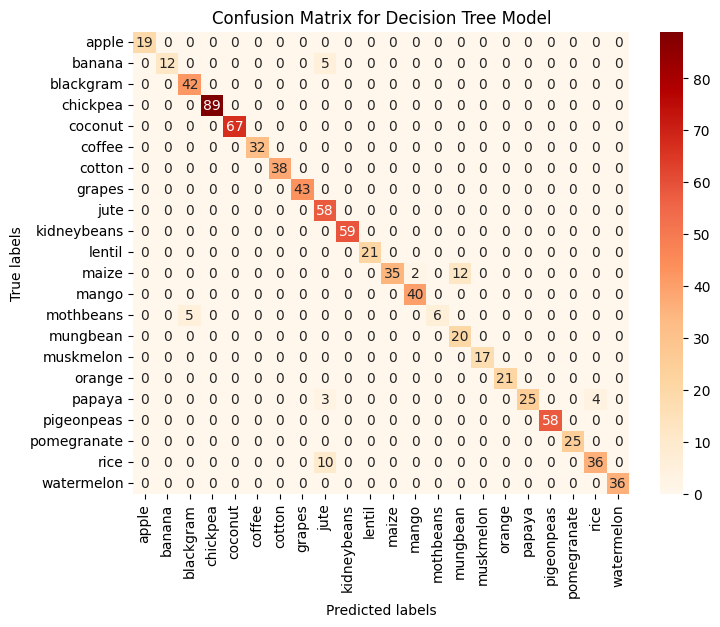

In [199]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.savefig('Confusion_Matrix_DecisionTree.png')
plt.show()

In [200]:
from sklearn.model_selection import cross_val_score

In [201]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.96190476, 0.93095238, 0.96071429, 0.94404762, 0.93571429])

# Saving trained Decision Tree Model

In [202]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Guassian Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9821428571428571
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.81      0.89        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.99        38
      grapes       1.00      1.00      1.00        43
        jute       0.91      1.00      0.95        58
 kidneybeans       1.00      1.00      1.00        59
      lentil       0.84      1.00      0.91        21
       maize       1.00      0.98      0.99        49
       mango       1.00      1.00      1.00        40
   mothbeans       0.73      1.00      0.85        11
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

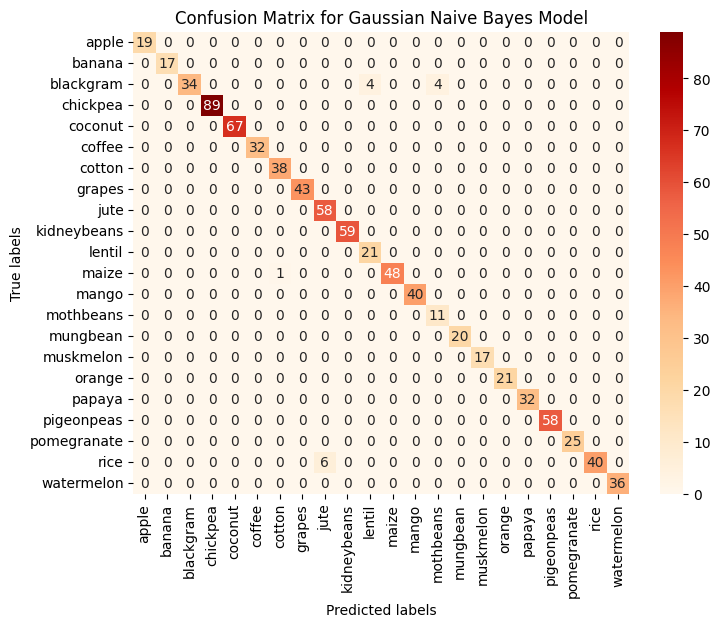

In [204]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes Model')
plt.savefig('Confusion_Matrix_NaiveBayes.png')
plt.show()

In [205]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.98928571, 0.99047619, 0.98452381, 0.98809524, 0.98214286])

# Saving trained Guassian Naive Bayes model

In [206]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [207]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly')  #jangan pakai SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Support Vector Machine (SVM)')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9821428571428571
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        32
      cotton       0.95      1.00      0.97        38
      grapes       1.00      1.00      1.00        43
        jute       0.84      0.98      0.90        58
 kidneybeans       0.98      1.00      0.99        59
      lentil       1.00      1.00      1.00        21
       maize       1.00      0.96      0.98        49
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0

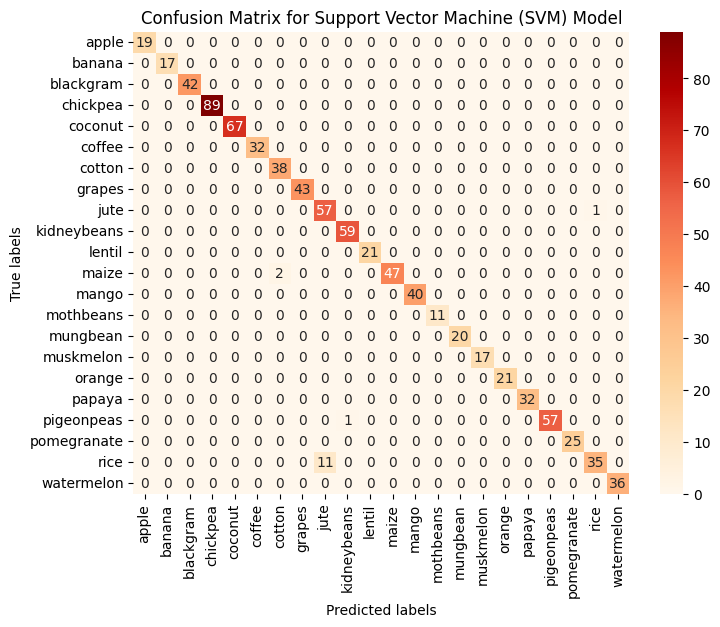

In [208]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
#plt.figure(figsize=[10,5],dpi = 100)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Support Vector Machine (SVM) Model')
plt.savefig('Confusion_Matrix_SVM.png')
plt.show()

In [209]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98571429, 0.97619048, 0.99047619, 0.98571429, 0.98095238])

# Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression Model ')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9523809523809523
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        17
   blackgram       0.95      0.83      0.89        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       0.97      0.94      0.95        32
      cotton       0.81      0.92      0.86        38
      grapes       1.00      1.00      1.00        43
        jute       0.79      0.98      0.88        58
 kidneybeans       1.00      1.00      1.00        59
      lentil       0.91      1.00      0.95        21
       maize       0.93      0.84      0.88        49
       mango       1.00      0.90      0.95        40
   mothbeans       0.56      0.82      0.67        11
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00   

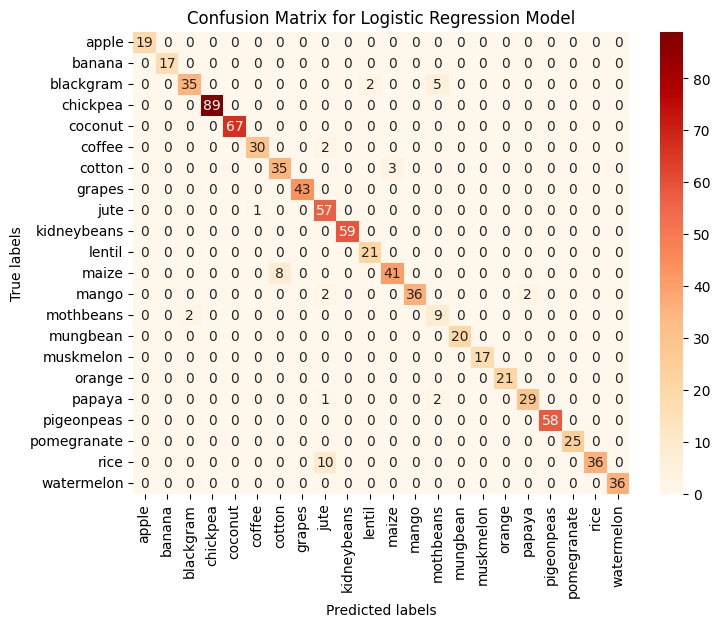

In [211]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
#plt.figure(figsize=[10,5],dpi = 100)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.savefig('Confusion_Matrix_LogisticRegression.png')
plt.show()

In [212]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.9702381 , 0.95952381, 0.96785714, 0.95      ])

# Saving trained Logistic Regression model

In [213]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Random Forest Classifier')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9988095238095238
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        38
      grapes       1.00      1.00      1.00        43
        jute       0.98      1.00      0.99        58
 kidneybeans       1.00      1.00      1.00        59
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        49
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

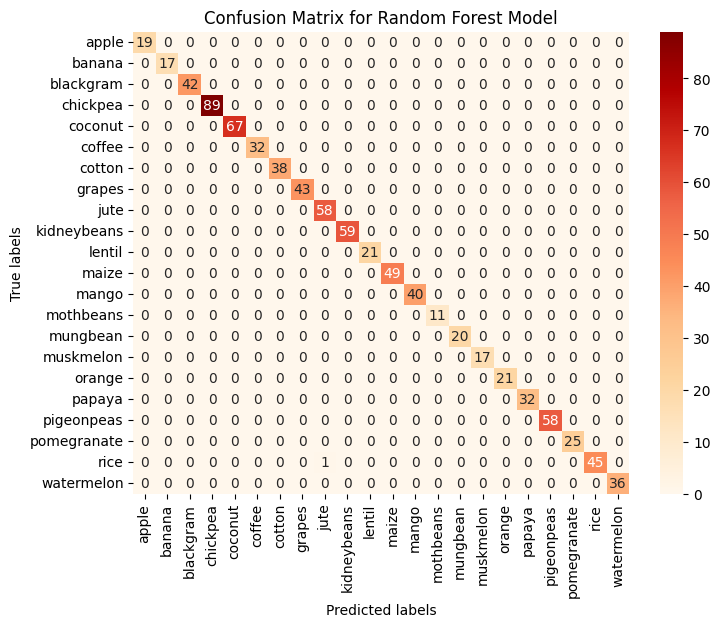

In [215]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
#plt.figure(figsize=[10,5],dpi = 100)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('Confusion_Matrix_RandomForest.png')
plt.show()

In [216]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99880952, 0.99761905, 0.99642857, 0.99761905, 0.9952381 ])

# Saving trained Random Forest model

In [217]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# KNN Classifier

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn_ = KNeighborsClassifier()
knn_.fit(Xtrain,Ytrain)
#knn.score(X_test_scaled, y_test)

predicted_values = knn_.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNeighbors Classifier')
print("K-NN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

K-NN's Accuracy is:  0.9821428571428571
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        17
   blackgram       0.98      1.00      0.99        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        32
      cotton       0.95      1.00      0.97        38
      grapes       1.00      1.00      1.00        43
        jute       0.87      0.95      0.91        58
 kidneybeans       0.98      1.00      0.99        59
      lentil       1.00      1.00      1.00        21
       maize       1.00      0.96      0.98        49
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      0.91      0.95        11
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.

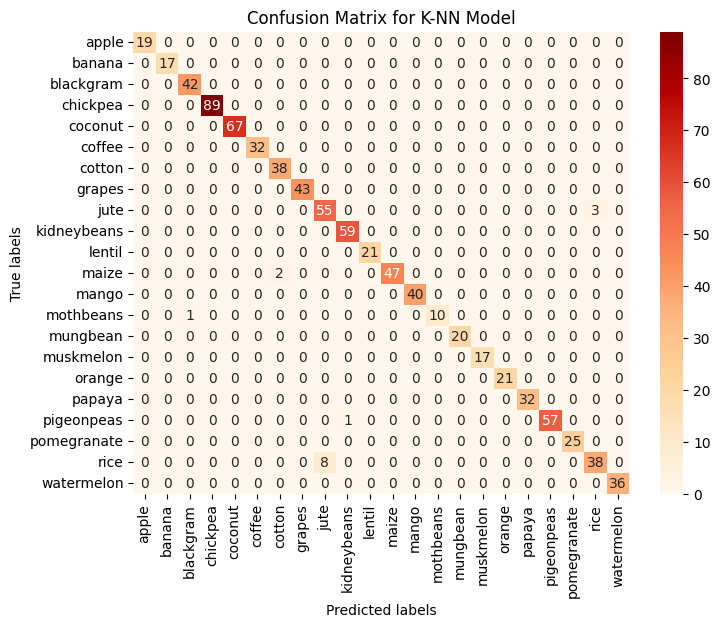

In [219]:
from sklearn.metrics import confusion_matrix

cmKNN = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
#plt.figure(figsize=[10,5],dpi = 100)
plt.figure(figsize=(8, 6))
sns.heatmap(cmKNN, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for K-NN Model')
plt.savefig('Confusion_Matrix_K-NN.png')
plt.show()

In [220]:
# Cross validation score (KNN)
score = cross_val_score(knn_,features,target,cv=5)
score

array([0.97738095, 0.98214286, 0.97857143, 0.97738095, 0.98333333])

In [221]:
### Saving trained K-NN model

In [222]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
KNN_pkl_filename = 'K-NN.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(knn_, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()

# XGBoost

In [223]:
# import xgboost as xgb
# XGBos = xgb.XGBClassifier()
# XGBos.fit(Xtrain,Ytrain)

# predicted_values = XGBos.predict(Xtest)
# print(Xtest)
# x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
# model.append('XGBoost Model')
# print("XGBoost's Accuracy is: ", x)

# print(classification_report(Ytest,predicted_values))

In [224]:
# from sklearn.metrics import confusion_matrix

# cmXG = confusion_matrix(Ytest, predicted_values)

# # Plot confusion matrix
# #plt.figure(figsize=[10,5],dpi = 100)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cmXG, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix for XGBoost Model')
# plt.savefig('Confusion_Matrix_XGBoost.png')
# plt.show()


In [225]:
# # Cross validation score (XGBoost)
# score = cross_val_score(XGBos,features,target,cv=5)
# score

### Saving trained XGBoost model

In [226]:
# import pickle
# # Dump the trained Naive Bayes classifier with Pickle
# XB_pkl_filename = 'XGBoost.pkl'
# # Open the file to save as pkl file
# XB_Model_pkl = open(XB_pkl_filename, 'wb')
# pickle.dump(XGBos, XB_Model_pkl)
# # Close the pickle instances
# XB_Model_pkl.close()

# masih salah untuk Booast
from sklearn.metrics import confusion_matrix

cmXG = confusion_matrix(Ytest, predicted_values)

### Plot confusion matrix
#plt.figure(figsize=[10,5],dpi = 100)
plt.figure(figsize=(8, 6))
sns.heatmap(cmXG, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.savefig('Confusion_Matrix_XGBoost.png')
plt.show()

## Accuracy Comparison

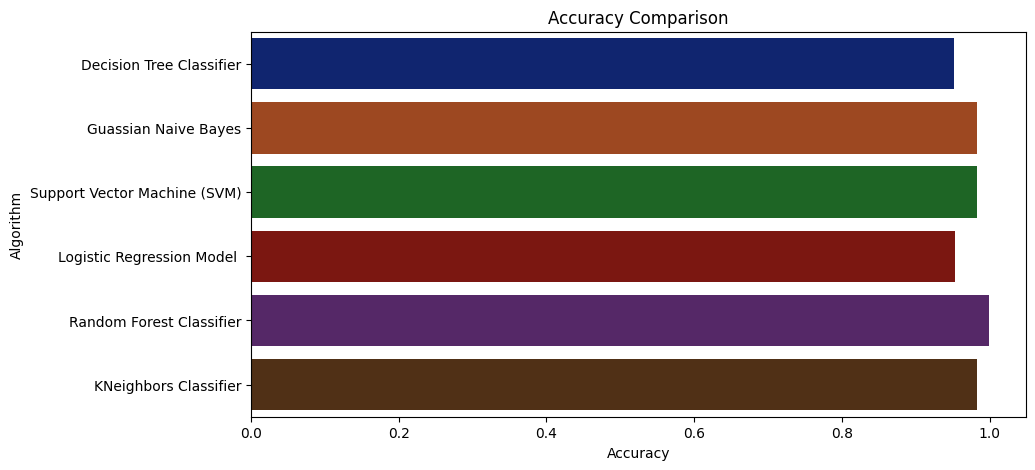

In [227]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')
plt.savefig('ML_Crop_Recc_plot.png')

In [228]:
#accurcy

accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', round(v,2)*100,'%')

Decision Tree Classifier --> 95.0 %
Guassian Naive Bayes --> 98.0 %
Support Vector Machine (SVM) --> 98.0 %
Logistic Regression Model  --> 95.0 %
Random Forest Classifier --> 100.0 %
KNeighbors Classifier --> 98.0 %


## Making a prediction with sensor (simulation)

In [229]:
import random
import pandas as pd

tempN = round(random.uniform(10,100),2)
tempP = round(random.uniform(10,100),2)
tempK = round(random.uniform(10,100),2)
tempt = round(random.uniform(10,50),2)
temph = round(random.uniform(40,80),2)
tempp = round(random.uniform(5,8),2)
tempr = round(random.uniform(20,300),2)
temps = random.uniform(0,4)
temps = int(temps)

if temps==1: temps_='clayey'
if temps==0: temps_='loamy'
if temps==2: temps_='sandy'
if temps==3: temps_='black'
if temps==4: temps_='red'
    

x_values = np.array([[tempN,tempP,tempK,tempt,temph,tempp,tempr,temps]])

x_values_ = np.array([[tempN,tempP,tempK,tempt,temph,tempp,tempr,temps_]])

data = pd.DataFrame(x_values_, columns = ['N ','P ','K ','temperature ','humidity ','ph ','rainfall ','soil '])
print("Input Parameter:\n",data,end="\n\n")
data = pd.DataFrame(x_values, columns = ['N','P','K','temperature','humidity','ph','rainfall','soil'])
print('model accuracy:')
print('1. Random Forest Clasifier -->', RF.predict(data))
print('2. Decision Tree Clasifier -->', DecisionTree.predict(data))
print('3. Guassian Naive Bayes    -->', NaiveBayes.predict(data))
print('4. K Nearest Neighbours    -->', knn_.predict(data))
# print('5. XGBoost Clasifier       -->', XGBos.predict(data)) # XGBoost prediksinya
print('6. Logistic Regression     -->', LogReg.predict(data))
print('7. Support Vector Machine  -->', SVM.predict(data))


Input Parameter:
       N     P      K  temperature  humidity    ph  rainfall   soil 
0  17.41  24.6  32.59        10.63     60.49  6.72     34.69  black

model accuracy:
1. Random Forest Clasifier --> ['mango']
2. Decision Tree Clasifier --> ['mothbeans']
3. Guassian Naive Bayes    --> ['pigeonpeas']
4. K Nearest Neighbours    --> ['mothbeans']
6. Logistic Regression     --> ['pomegranate']
7. Support Vector Machine  --> ['mothbeans']
